In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
dff = pd.read_csv("/content/drive/MyDrive/eng_conf_full.csv",lineterminator="\n")


In [5]:
tot=pd.read_csv('/content/drive/MyDrive/total_data_twitter.csv',lineterminator="\n")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,17,24,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
tot=tot[['_id','language','content_type']]

In [7]:
df=dff.merge(tot, on='_id', how='inner')


In [8]:
df=df.loc[df['content_type'] == 'text']


In [9]:
df.shape

(742999, 11)

In [10]:
df=df.drop_duplicates(subset=['tweet']) #remove suplicates based on tweet


In [11]:
df.shape

(707417, 11)

In [13]:
cols = ['eng_cnerg_confidence','eng_trac1_confidence','eng_founta_confidence','eng_hateeval_confidence','eng_offenseeval_confidence']
df['mean_all'] = df[cols].mean(axis=1)
df.sort_values(by='mean_all', ascending=False, inplace=True)

In [14]:
df

,Unnamed: 0,_id,tweet_id,tweet,eng_cnerg_confidence,eng_trac1_confidence,eng_founta_confidence,eng_hateeval_confidence,eng_offenseeval_confidence,language,content_type,mean_all
6287,6287,61c0336ce7958c0f42f01542,1301225127871479813,"To the bitch who tried merging INTO my car, I ...",0.86,0.97,0.99,0.97,0.95,en,text,0.948
12677,12677,61c1e01478e60889d95c6aa5,1372253879908372483,Your white ass can go to hell. Stupid bitch,0.87,0.97,0.99,0.96,0.95,en,text,0.948
250404,250404,61e519642584e2832c8b51b7,1079527183436132352,Fuck that whore. She ain’t shit. When I come o...,0.89,0.97,0.99,0.96,0.93,en,text,0.948
6612,6612,61c033c1301de3f6a4c397d8,1471716113109168129,This nerd bitch doesn't even lift. What a faggot.,0.90,0.97,0.99,0.93,0.94,en,text,0.946
7203,7203,61c0348ae7958c0f42f018ef,1240704795637198849,I really rue the day any one of these whores b...,0.87,0.97,0.99,0.96,0.94,en,text,0.946
...,...,...,...,...,...,...,...,...,...,...,...,...
306121,306121,61cbfabf68b8e44d2c3a48d8,1211992266581172224,Thank you so much guys. Happy new year 🤗. ☮️,0.03,0.04,0.01,0.02,0.02,en,text,0.024
276772,276772,61c2336a0c7c664fcf0d5812,1377268746327269379,"I am officially closing down this Page, It's b...",0.03,0.05,0.01,0.01,0.02,en,text,0.024
303854,303854,61cbf8d634ebea570c110e71,1218643689670684674,"Thank you, everyone! 🌹🌱✨",0.03,0.04,0.01,0.02,0.02,en,text,0.024
303496,303496,61cbf89268b8e44d2c3a45ff,1340025088544894976,Thank you 💕💞see you soon,0.02,0.04,0.01,0.03,0.02,en,text,0.024


In [15]:
df['mean_all'] = df['mean_all'].apply(lambda x: np.round(x, 2))

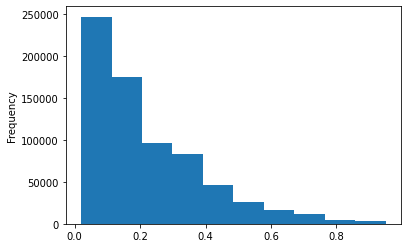

In [16]:
df['mean_all'].plot(kind='hist')

In [17]:
df1= df[df['mean_all'].between(0, 0.1,inclusive='both')]
df2= df[df['mean_all'].between(0.11, 0.2,inclusive='both')]
df3= df[df['mean_all'].between(0.21, 0.3,inclusive='both')]
df4= df[df['mean_all'].between(0.31, 0.4,inclusive='both')]
df5= df[df['mean_all'].between(0.41, 0.5,inclusive='both')]
df6= df[df['mean_all'].between(0.51, 0.6,inclusive='both')]
df7= df[df['mean_all'].between(0.61, 0.7,inclusive='both')]
df8= df[df['mean_all'].between(0.71, 0.8,inclusive='both')]
df9= df[df['mean_all'].between(0.81, 0.9,inclusive='both')]
df10= df[df['mean_all'].between(0.91, 1,inclusive='both')]


In [28]:
df11=df1.sample(n=400,random_state=1)
df12=df2.sample(n=800,random_state=1)
df13=df3.sample(n=800,random_state=1)
df14=df4.sample(n=1000,random_state=1)
df15=df5.sample(n=1000,random_state=1)
df16=df6.sample(n=1000,random_state=1)
df17=df7.sample(n=1000,random_state=1)
df18=df8.sample(n=800,random_state=1)
df19=df9.sample(n=800,random_state=1)
df20=df10.sample(n=400,random_state=1)

In [29]:
frames = [df11,df12,df13,df14,df15,df16,df17,df18,df19,df20]


In [30]:
result = pd.concat(frames)
display(result)

,Unnamed: 0,_id,tweet_id,tweet,eng_cnerg_confidence,eng_trac1_confidence,eng_founta_confidence,eng_hateeval_confidence,eng_offenseeval_confidence,language,content_type,mean_all
742458,742458,61e28c4c5e6622c07629c8b5,1210970724736716800,@geneliad @FarahKhanAli Love you ma'am from Ko...,0.31,0.05,0.01,0.08,0.03,en,text,0.10
417114,417114,61dd4fd071ac1edc4bcb6c6a,1455131345609445380,@geeta_phogat Thank you,0.16,0.05,0.01,0.11,0.03,en,text,0.07
450068,450068,61dfd78ae7dfd99c9f9f88f4,729997239381200898,@inamitha Happy Birthday from @FamousBirthdays...,0.19,0.03,0.01,0.08,0.03,en,text,0.07
517284,517284,61e119880776fd1c9471105a,1317097798790123529,@mohan_manjima @KeerthyOfficial @PokkiriSanty ...,0.12,0.04,0.01,0.07,0.03,en,text,0.05
281484,281484,61cab2753996d00fb4f3685a,1357949759017783297,Available on Facebook Though Link- https://t...,0.05,0.10,0.01,0.01,0.08,en,text,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...
15657,15657,61c1e3b878e60889d95c72ad,1352322501968355331,"@amourthreadzz Hey ugly ass, bald headed ass b...",0.86,0.97,0.99,0.91,0.95,en,text,0.94
12701,12701,61c1e01e78e60889d95c6ab4,1372253842956546054,Got that kind money make a broke bitch bitter!,0.77,0.97,0.99,0.95,0.90,en,text,0.92
15896,15896,61c1e41278e60889d95c7368,1441107460324880390,Who would want the crazy bitch,0.80,0.97,0.99,0.95,0.90,en,text,0.92
10752,10752,61c1ddda78e60889d95c6600,1413203725871632384,Don’t nobody be hating on you bitches Yall don...,0.83,0.97,0.99,0.90,0.91,en,text,0.92


In [31]:
import re
def remove_usernames_links(tweet):
  tweet=re.sub(r'@(\S+)\s?','<handle replaced>',tweet)
  tweet = re.sub('http[^\s]+','',tweet) #remove links
  return tweet
result['tweet_edit'] = result['tweet'].apply(remove_usernames_links)

In [32]:
result

,Unnamed: 0,_id,tweet_id,tweet,eng_cnerg_confidence,eng_trac1_confidence,eng_founta_confidence,eng_hateeval_confidence,eng_offenseeval_confidence,language,content_type,mean_all,tweet_edit
742458,742458,61e28c4c5e6622c07629c8b5,1210970724736716800,@geneliad @FarahKhanAli Love you ma'am from Ko...,0.31,0.05,0.01,0.08,0.03,en,text,0.10,<handle replaced><handle replaced>Love you ma'...
417114,417114,61dd4fd071ac1edc4bcb6c6a,1455131345609445380,@geeta_phogat Thank you,0.16,0.05,0.01,0.11,0.03,en,text,0.07,<handle replaced>Thank you
450068,450068,61dfd78ae7dfd99c9f9f88f4,729997239381200898,@inamitha Happy Birthday from @FamousBirthdays...,0.19,0.03,0.01,0.08,0.03,en,text,0.07,<handle replaced>Happy Birthday from <handle r...
517284,517284,61e119880776fd1c9471105a,1317097798790123529,@mohan_manjima @KeerthyOfficial @PokkiriSanty ...,0.12,0.04,0.01,0.07,0.03,en,text,0.05,<handle replaced><handle replaced><handle repl...
281484,281484,61cab2753996d00fb4f3685a,1357949759017783297,Available on Facebook Though Link- https://t...,0.05,0.10,0.01,0.01,0.08,en,text,0.05,Available on Facebook Though Link-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15657,15657,61c1e3b878e60889d95c72ad,1352322501968355331,"@amourthreadzz Hey ugly ass, bald headed ass b...",0.86,0.97,0.99,0.91,0.95,en,text,0.94,"<handle replaced>Hey ugly ass, bald headed ass..."
12701,12701,61c1e01e78e60889d95c6ab4,1372253842956546054,Got that kind money make a broke bitch bitter!,0.77,0.97,0.99,0.95,0.90,en,text,0.92,Got that kind money make a broke bitch bitter!
15896,15896,61c1e41278e60889d95c7368,1441107460324880390,Who would want the crazy bitch,0.80,0.97,0.99,0.95,0.90,en,text,0.92,Who would want the crazy bitch
10752,10752,61c1ddda78e60889d95c6600,1413203725871632384,Don’t nobody be hating on you bitches Yall don...,0.83,0.97,0.99,0.90,0.91,en,text,0.92,Don’t nobody be hating on you bitches Yall don...


In [33]:
rslt=result[['tweet_id','language',	'content_type','tweet_edit']]

In [35]:
rslt['image_url']='[]'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
rslt

,tweet_id,language,content_type,tweet_edit,image_url
742458,1210970724736716800,en,text,<handle replaced><handle replaced>Love you ma'...,[]
417114,1455131345609445380,en,text,<handle replaced>Thank you,[]
450068,729997239381200898,en,text,<handle replaced>Happy Birthday from <handle r...,[]
517284,1317097798790123529,en,text,<handle replaced><handle replaced><handle repl...,[]
281484,1357949759017783297,en,text,Available on Facebook Though Link-,[]
...,...,...,...,...,...
15657,1352322501968355331,en,text,"<handle replaced>Hey ugly ass, bald headed ass...",[]
12701,1372253842956546054,en,text,Got that kind money make a broke bitch bitter!,[]
15896,1441107460324880390,en,text,Who would want the crazy bitch,[]
10752,1413203725871632384,en,text,Don’t nobody be hating on you bitches Yall don...,[]


In [38]:
rslt.to_csv('eng_pooled_new.csv',index=False)